<a href="https://colab.research.google.com/github/niteshbansal07/autoins_pricing/blob/main/basicpricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Auto Insurance Pricing Simulation
--Prepared by Nitesh Bansal starting 5/21/2025

This Colab notebook simulates a basic auto insurance pricing model for 500 policyholders.  
Premiums are calculated using synthetic risk factors such as:

- Driver age  
- Vehicle type  
- Number of accidents  
- Location-based risk score

This tool uses basic actuarial modeling concepts using Python for an introductory project.

In [2]:
#creating pseudo data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#random seed for reporducability
np.random.seed(42)

#degining constants
n_samples = 500
vehicle_types = ['Sedan', 'SUV', 'Sports']
postal_codes = [f'M{np.random.randint(1,10)}{chr(np.random.randint(65,90))}' for _ in range(20)]

#generating data
ages = np.random.randint(18, 70, size=n_samples)
vehicle = np.random.choice(vehicle_types, size=n_samples, p=[0.5, 0.3, 0.2])
accidents = np.random.poisson(lam=0.5, size=n_samples)
postal_code = np.random.choice(postal_codes, size=n_samples)
location_risk = np.round(np.random.uniform(0.5, 1.5, size=n_samples), 2)  # risk multiplier
base_rate = 600

#risk factors adjustments
age_factor = np.where(ages < 25, 1.3, np.where(ages < 45, 1.0, 1.1))
vehicle_factor = np.select(
    [vehicle == 'Sedan', vehicle == 'SUV', vehicle == 'Sports'],
    [1.0, 1.2, 1.5]
)
accident_factor = 1 + accidents * 0.25

#premium calcs
premium = base_rate * age_factor * vehicle_factor * accident_factor * location_risk

# final df using pandas
df = pd.DataFrame({
    'Age': ages,
    'Vehicle_Type': vehicle,
    'Accidents': accidents,
    'Postal_Code': postal_code,
    'Location_Risk': location_risk,
    'Premium': np.round(premium, 2)
})

df.head()


,Age,Vehicle_Type,Accidents,Postal_Code,Location_Risk,Premium
0,42,Sports,0,M6U,1.38,1242.00
1,31,Sports,1,M7U,0.89,1001.25
2,67,Sports,1,M7S,1.33,1645.88
3,26,SUV,0,M6L,1.29,928.80
4,43,Sports,1,M7S,1.12,1260.00


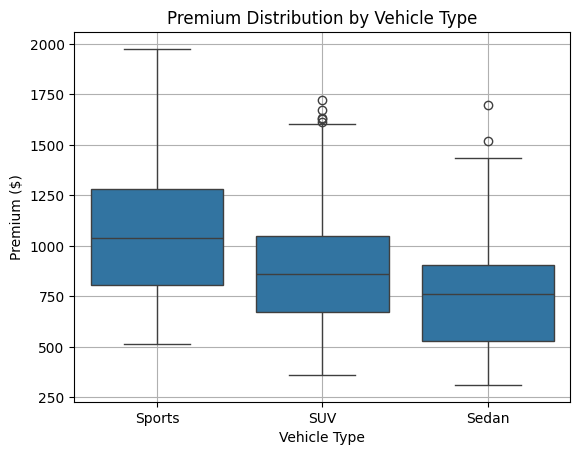

In [3]:
#visualizing the data
sns.boxplot(x='Vehicle_Type', y='Premium', data=df)
plt.title('Premium Distribution by Vehicle Type')
plt.ylabel('Premium ($)')
plt.xlabel('Vehicle Type')
plt.grid(True)
plt.show()

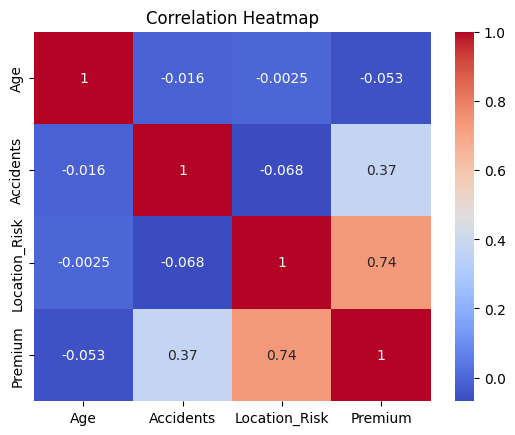

In [4]:
#corr heatmap
sns.heatmap(df[['Age', 'Accidents', 'Location_Risk', 'Premium']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [5]:
#LRM
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Prepare features
features = df[['Age', 'Vehicle_Type', 'Accidents', 'Location_Risk']]
target = df['Premium']

# Encode categorical
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), ['Vehicle_Type'])
], remainder='passthrough')

# Linear regression pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(features, target)
print("Model R^2 Score:", model.score(features, target))


Model R^2 Score: 0.9093501746785752
